Using [jupyter-scikit-hep](https://github.com/tomeichlersmith/jupyter-scikit-hep) for running this notebook. It is a nice tool since it is containerized (and you have docker installed) and then we are using the same versions of the python packages as each other.

The following occurred after running
```
ldmx fire target_mumu.py
```
_outside_ of jupyter (in the WSL terminal we set up).

In [1]:
import upldmx
import awkward as ak

In [2]:
events = upldmx.load('target_dimuon_beam_4GeV_Nevents_1M_run_1.root')
events

<Array [{EventHeader: {...}, ...}, ..., {...}] type='3687 * {EventHeader: E...'>

In [7]:
import hist

# import matplotlib and style it
# so its more familiar to ROOT users
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplhep
mpl.style.use(mplhep.style.ROOT)

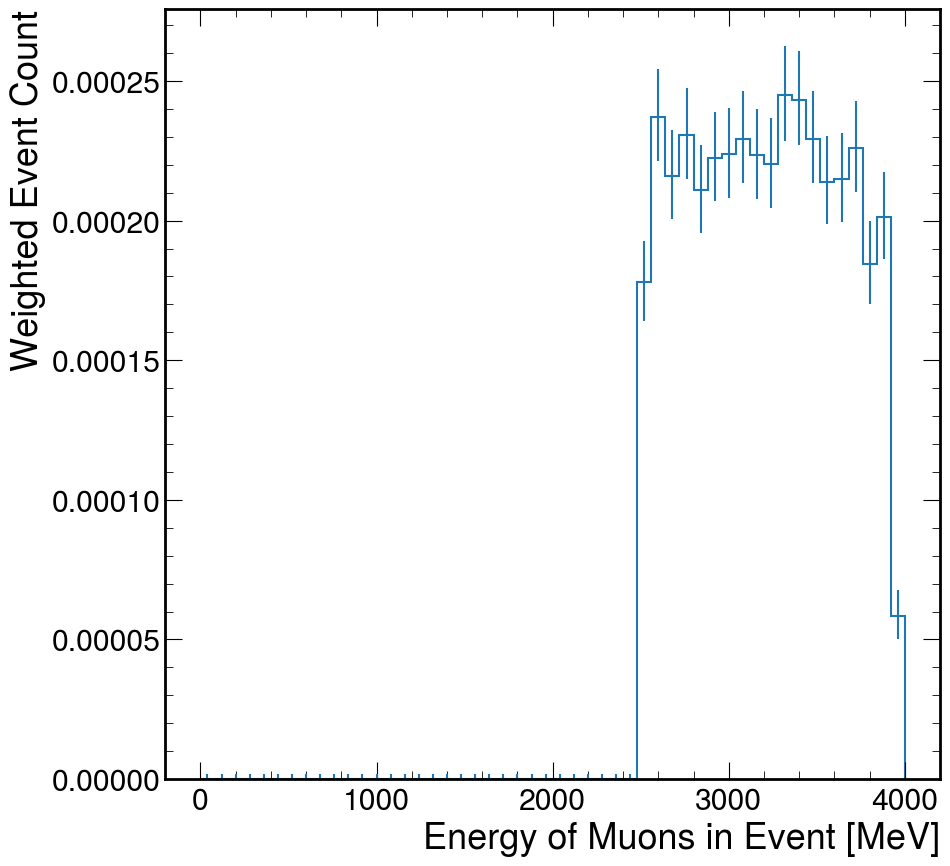

In [9]:
muon_energy_hist = hist.Hist.new.Reg(50,0,4000,name='muonic_energy',label='Energy of Muons in Event [MeV]').Weight()
muon_energy_hist.fill(
    ak.sum(events.SimParticles[abs(events.SimParticles.pdgID) == 13].momentum.energy, axis=1),
    weight = events.EventHeader.weight
)
plt.ylabel('Weighted Event Count')
muon_energy_hist.plot()
plt.show()